# FAIRe Qualitäts-KPIs
Autor: Diogo Fernandes Costa  
Datum: 23.10.2023

## Forschungsfrage
Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit:

In welchem Maß tragen die FAIR-Prinzipien zur Verbesserung der Qualität von technischen Produkten, speziell eines Fahrzeugs, bei?

## Erstes Fahrzeug


### Versuchsziel
Formulieren Sie ein Versuchsziel für diesen ersten Versuch:

Das Versuchsziel liegt in der Konstruktion eines Autos, welches aus wenigen Bauteilen besteht und in der Lage ist, sich fortzubewegen und auch bei hohem Beschleunigen Stabilität aufzuweisen. Es soll dabei für den Verkauf an Menschen, die ein Spielzeugauto kaufen möchten, optimiert sein und möglichst leicht gebaut sein, um somit wenig Leistung zur Fortbewegung zu nutzen.

### Versuchsaufbau

Bauen Sie ein erstes Fahrzeug aus den gegebenen LEGO-Teilen in der CAD-Software LeoCAD auf.

Hierbei gelten die folgenden Rahmenbedingungen:
- Das Fahrzeug muss aus Baugruppen, Bauteilen und Komponenten bestehen.
- Es muss mindestens vier Räder besitzen
- Es muss sich durch den elektrischen Antrieb fortbewegen können. 
- Die Verwendung eines Getriebes zwischen Motor und Antriebsachse(n) ist verpflichtend. 
- Die Farbe von mindestens einem Teil soll sich von der in LeoCAD hinterlegten Standardfarbe unterscheiden.
- Es sind nur die LEGO-Teile zu verwenden, welche sich in den JSON-Dateien bzw. in
der zur Verfügung gestellten Teilebibliothek befinden.

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu (*Hinweise: Ein Bild lässt sich mit \!\[Bildbeschreibung](/Pfad/zum/Bild) hinzufügen. Achten Sie darauf, das Bild später auch in Git hinzuzufügen*):


![bildcar1.png](figures/bildcar1.png)

Beschreiben Sie kurz und präzise Ihr Fahrzeug:

Mein Auto besteht aus einem Fahrzeuggestell, das sehr einem echtem Fahrzeug ähnelt. Hierbei habe ich die 8-Technic-Bricks als Front- und Heckstoßstange und für die Montage des Motors und der Batterie verwendet. Diese habe ich auf zwei 14-Technic-Bricks aufgesteckt, die mir als Hilfsrahmen für das Auto dienen. An den jeweiligen Enden habe ich jeweils die beiden Achsen zur Lagerung der Räder verwendet, wobei ich vorne etwas Platz gelassen habe.
Ich habe mich hierbei für einen Frontantrieb entschieden, da sich die Batterie am Heck des Fahrzeugs befindet und somit die Stabilität aufgrund der besseren Gewichtsverteilung verbessert wird.
Für die genaue Montage der Räder auf die Achsen habe ich Distanzscheiben verwendet. Zur Momentenübertragung verwende ich ein Getriebe, welches aus zwei Wellen und drei unterschiedlichen Zahnradpaarungen besteht. An der Motoreingangswelle und an der Zwischenwelle habe ich jeweils zwei unterschiedliche Zahnradpaarungen verwendet, die das Moment an die Vorderachse übertreiben und somit das Fahrzeug in Bewegung versetzen.

Bauen Sie das Fahrzeug nun in unserem Software-Framework zusammen. Instanziieren Sie die LEGO-Teile und lesen Sie dabei auch die Eigenschaften ein. Ergänzen Sie zusätzliche Eigenschaften, wie z.B. die Farbe. Referenzieren Sie die Teile aufeinander und erstellen Sie auf diese Weise sinnvolle Bauteile, Baugruppen und das
Gesamtsystem. Nutzen Sie die hierfür bereitgestellten Klassendefinitionen und Methoden. Achten Sie auf eine gute Code-Dokumentation. Sie können sich für die Bearbeitung an den zur Verfügung gestellten Code-Zellen orientieren, können hiervon jedoch auch abweichen.

*Hinweise: Achten Sie auf die Unterschiede zum Minimalbeispiel. Eine direkte Kopie ist nicht möglich. Achten Sie außerdem darauf, ein Teil (eindeutig identifiziert durch seine UUID) nicht an mehreren Stellen zu verbauen*

In [2]:
import json
import pprint
from functions import calculation_rules

from functions.classes import LegoComponent
from functions.classes import LegoAssembly
from functions.classes import AggregationLayer
from functions.classes import KPIEncoder
from functions.classes import print_assembly_tree

In [3]:
#Initialize axles
with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)

#Create front axle
front_axle1 = LegoComponent("front axle", axles["3708"])
    
#Create back axle
back_axle1 = front_axle1.clone("back axle")


#Create shaft for engine input/output and intermediate shaft

engine_input_shaft1 = LegoComponent("engine input_shaft" , axles["32073"])
intermediate_shaft1 = engine_input_shaft1.clone("intermediate shaft")

#Initialize and create wheels and bushes
with open("datasheets/wheels.json") as json_file:
    wheels = json.load(json_file)


front_wheel_right1 = LegoComponent(
    "front wheel right", wheels["3482c01"], surface="rough", paint="glossy"
)

front_wheel_left1 = front_wheel_right1.clone("front wheel left")
back_wheel_right1 = front_wheel_right1.clone("back wheel right")
back_wheel_left1 = front_wheel_right1.clone("back wheel left")

with open("datasheets/frame.json") as json_file:
    frame = json.load(json_file)

bush_front_wheel_right1 = LegoComponent("bush on the front right wheel", frame["32123"])
bush_front_wheel_left1 = bush_front_wheel_right1.clone("bush on the front left wheel")
bush_back_wheel_right1 = bush_front_wheel_right1.clone("bush on the back right wheel")
bush_back_wheel_left1 = bush_front_wheel_right1.clone("bush on the back left wheel")

#Create parts for the chassis of the car
left_bar1 = LegoComponent("left bar", frame["32018"])
right_bar1 = left_bar1.clone("right bar")

engine_mount1 = LegoComponent("engine mount", frame["3702"])
battery_mount1 = engine_mount1.clone("battery mount")
front_bumper1 = engine_mount1.clone("front bumper")
back_bumper1 = engine_mount1.clone("back bumper")

#Initialize Gears
with open("datasheets/gears.json") as json_file:
    gears = json.load(json_file)
    
gear_engine_input_shaft_first1 = LegoComponent("First gear on the engine input shaft", gears["94925"])
gear_engine_input_shaft_second1 = gear_engine_input_shaft_first1.clone("Second gear on the engine input shaft")
gear_front_axle_first1 = gear_engine_input_shaft_first1.clone("First gear on the front axle")
gear_front_axle_second1 = gear_engine_input_shaft_first1.clone("Second gear on the front axle")

gear_intermediate_shaft_first1 = LegoComponent("First gear on the intermediate shaft", gears["3648"])
gear_intermediate_shaft_second1 = gear_intermediate_shaft_first1.clone("Second gear on the intermediate shaft")

#Initialize electric engine
with open("datasheets/motors.json") as json_file:
    motors = json.load(json_file)
    
engine1 = LegoComponent("engine", motors["8883-1"])

#Initialize battery
with open("datasheets/batteries.json") as json_file:
    batteries = json.load(json_file)

battery1 = LegoComponent("battery",batteries["88000-1"])




In [4]:
# set properties
#################
front_axle1.properties["color"] = "red"
back_axle1.properties["color"] = "red"

engine_mount1.properties["color"] = "bright light yellow"
battery_mount1.properties["color"] = "bright light yellow"
front_bumper1.properties["color"] = "bright light yellow"
back_bumper1.properties["color"] = "bright light yellow"

engine_input_shaft1.properties["color"] = "red"
intermediate_shaft1.properties["color"] = "red"

front_wheel_right1.properties["color"] = "red"
front_wheel_left1.properties["color"] = "red"
back_wheel_right1.properties["color"] = "red"
back_wheel_left1.properties["color"] = "red"

bush_front_wheel_right1.properties["color"] = "red"
bush_front_wheel_left1.properties["color"] = "red"
bush_back_wheel_right1.properties["color"] = "red"
bush_back_wheel_right1.properties["color"] = "red"

left_bar1.properties["color"] = "bright light yellow"
right_bar1.properties["color"] = "bright light yellow"

gear_engine_input_shaft_first1.properties["color"] = "red"
gear_engine_input_shaft_second1.properties["color"] = "red"
gear_front_axle_first1.properties["color"] = "red"
gear_front_axle_second1.properties["color"] = "red"
gear_intermediate_shaft_first1.properties["color"] = "red"
gear_intermediate_shaft_second1.properties["color"] = "red"

engine1.properties["color"] = "red"
battery1.properties["color"] = "red"


In [5]:
# aggregate components
#Create subassemblies
#create the front axle subassembly
front_axle_subas1 = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "front axle subassembly",assembly_method="stick together like lego blocks",
)  
front_axle_subas1.add([front_wheel_right1,front_wheel_left1,front_axle1,bush_front_wheel_right1,bush_front_wheel_left1])

#create the back axle subassembly
back_axle_subas1 = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "back axle subassembly",assembly_method="stick together like lego blocks",
)  
back_axle_subas1.add([back_wheel_right1,back_wheel_left1,back_axle1,bush_back_wheel_right1,bush_back_wheel_left1])

#create gearbox
gearbox1 = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "gearbox",assembly_method="stick together like lego blocks",
)
gearbox1.add([gear_engine_input_shaft_first1,gear_engine_input_shaft_second1,gear_front_axle_first1,gear_front_axle_second1,gear_intermediate_shaft_first1,gear_intermediate_shaft_second1,intermediate_shaft1])

#create engine subassembly
engine_subas1 = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "engine subassembly",assembly_method="stick together like lego blocks",
)

engine_subas1.add([engine1,engine_input_shaft1,engine_mount1])


#Create battery subassembly
battery_subas1 = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "battery subassembly",assembly_method="stick together like lego blocks",
)

battery_subas1.add([battery1,battery_mount1])

#Create base frame of the car
base_frame1 = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "base frame",assembly_method="stick together like lego blocks",
)

base_frame1.add([left_bar1,right_bar1,front_bumper1,back_bumper1])

######################################################
#Create assemblies
drivetrain1 = LegoAssembly(
    AggregationLayer.ASSEMBLY,
    "drivetrain", assembly_method="stick together like lego blocks",
)  

drivetrain1.add([engine_subas1,gearbox1,front_axle_subas1])

chassis1 = LegoAssembly(
    AggregationLayer.ASSEMBLY,
    "chassis", assembly_method="stick together like lego blocks",
)

chassis1.add([battery_subas1,base_frame1])

############################################################
#Create finished car
car1= LegoAssembly(
    AggregationLayer.SYSTEM,
    "first car"
)
# add frame and subassemblies
car1.add([chassis1,drivetrain1,back_axle_subas1])

# Print the full assembly with all levels
print_assembly_tree(car1)


LegoAssembly first car [2c3874d2-30ec-4d19-94be-f739434048b0]
├── LegoAssembly chassis [1689014a-2981-461e-af6e-8167ec2395c4]
│   ├── LegoAssembly battery subassembly [707ce007-99fd-47e9-b28f-fb31e01d13db]
│   │   ├── LegoComponent battery [bc96b5e1-2c17-46e9-bc23-7948c1240873]
│   │   └── LegoComponent battery mount [081f2915-a1b5-44a6-a4d4-3b68febfffa7]
│   └── LegoAssembly base frame [df3e923f-cf64-44ad-a1b0-a6f22d5b505e]
│       ├── LegoComponent left bar [78b3824c-3c14-4875-a2be-5457b6b27c8c]
│       ├── LegoComponent right bar [791ff786-4cc7-47b8-8cde-afeea2dd9e8e]
│       ├── LegoComponent front bumper [b50cc995-5410-47f1-a313-3ad7271a0555]
│       └── LegoComponent back bumper [00880ca6-8c53-4b1a-8c7d-e11a13d97597]
├── LegoAssembly drivetrain [771ea7be-4652-4a1e-b097-6f6a9b7f25d8]
│   ├── LegoAssembly engine subassembly [b5fa71ae-0e74-4294-994b-a8c49f177a95]
│   │   ├── LegoComponent engine [073713a0-9d4f-4caa-a11f-5e8d260789f0]
│   │   ├── LegoComponent engine input_shaft [a72

### Analyse
Bestimmen Sie die Qualität Ihres Fahrzeugs mittels KPIs.
Die Qualität des Fahrzeugs ist mit mindestens einem KPI je Qualitätsdimension (Aufwand, Verfügbarkeit, Akzeptanz) zu bestimmen. Enwickeln Sie zunächst sinnvolle KPIs, welche mit den gegebenen Daten umsetzbar sind. Halten Sie die Berechnungsvorschriften im Jupyter Notebook fest. Implementieren Sie deren Berechnung für das Gesamtsystem "Fahrzeug" mittels einzelner Funktionen im Skript `calculation_rules`. Sie können zusätzlich Ihre Methoden auch auf die niedrigeren Aggregationsebenen anwenden.

Beschreiben Sie den jeweiligen KPI und geben Sie seine Berechnungsvorschrift an:

Die gesamte Fahrzeugmasse spielt eine essentielle Rolle. Eine erhöhte Fahrzeugmasse führt zu einem erhöhten Bedarf an Leistung, um das Fahrzeug zu bewegen und resultiert somit in einen höheren Energieverbrauch. Jedoch ist zu beachten, dass das Fahrzeug in Bezug auf das Vorhandensein spezifischer Motoren nicht zu leicht ist, da sonst die gesamte Stabilität des Fahrzeugs unter z.B. Beschleunigen darunter leidet.

$$
m_{ges} = \sum\nolimits_{1=1}^N m_{i} \textrm{, N Anzahl an Bauteilen}
$$

Die Kosten für das jeweilige Fahrzeug spielen auch sehr wichtige Rolle, spezifisch in der Qualität aber auch in der finanziellen Akzeptanz der Interessenten. Somit sollte man versuchen den Preis so gering wie möglich zu halten, damit sich auch viele Personen dieses Fahrzeug leisten können.

$$
Preis = \sum\nolimits_{1=1}^N Preis_{i} \textrm{, N Anzahl an Bauteilen}
$$

Die Berechnungsvorschrift für die Lieferzeit beschreibt die maximale Zeit, die benötigt bzw. abgewartet werden muss, bis alle Bauteile für die Konstruktion geliefert sind. Dabei ist die höchste Lieferzeit unter allen Bauteilen der Kennwert, der ausgegeben und in der Fahrzeugbewertung berücksichtigt werden muss. Die Lieferzeit ist hierbei ein essentieller Kennwert zur Bewertung der Verfügbarkeit und Akzeptanz der gesamten Gesellschaft.

$$
\max \{Lieferzeit\enspace aller\enspace Bauteile\}
$$

Dabei ist jedoch auch zu berücksichtigen, dass der Fall eintreten kann, dass ein Bauteil eine sehr hohe Lieferzeit haben kann, während alle anderen sehr schnell bereitgestellt werden können. Somit kann auch dies speziell im Falle des Aftersales und der Wartung ein sehr ausschlaggebender Faktor sein.

$$
Durchschnittliche\enspace Lieferzeit = \frac{\sum\nolimits_{i}
Lieferzeit\enspace aller\enspace Bauteile\enspace}
{Anzahl\enspace Bauteile}
$$

Halten Sie die berechneten Werte für die KPIs im Notebook
fest:

In [6]:
# calculate the KPIs for the car
total_mass1 = calculation_rules.kpi_mass(car1)

total_price1 = calculation_rules.kpi_price(car1)

total_delivery_time1 = calculation_rules.kpi_delivery_time(car1)

assemblies1 = [front_axle_subas1,back_axle_subas1,gearbox1,engine_subas1,battery_subas1,base_frame1,drivetrain1,chassis1]

assembly_mass1 = []
assembly_price1 = []
assembly_delivery_time1 = []
assembly_avg_delivery_time1 = []
for i in assemblies1:
    assembly_mass1.append(str(i.properties["label"]) + ": " + str(calculation_rules.kpi_mass(i)) + " g")

    assembly_price1.append(str(i.properties["label"]) + ": " + str(calculation_rules.kpi_price(i)) + " €")
    
    assembly_delivery_time1.append(str(i.properties["label"]) + ": " + str(calculation_rules.kpi_delivery_time(i)[0]) + " Tage")
    
    assembly_avg_delivery_time1.append(str(i.properties["label"]) + ": " + str(calculation_rules.kpi_delivery_time(i)[1]) + " Tage")

    #Add the KPIs to the assemblies
    i.properties["mass [g]"] = calculation_rules.kpi_mass(i)
    
    i.properties["price [Euro]"] = calculation_rules.kpi_price(i)
    
    i.properties["delivery time [d]"] = calculation_rules.kpi_delivery_time(i)

    
#Add the KPIs to the car    
car1.properties["mass [g]"] = total_mass1
car1.properties["price [Euro]"] = total_price1
car1.properties["delivery time [d]"] = total_delivery_time1



In [19]:
# print your KPIs
print("Gesamtmasse: ",total_mass1, "g")
print("Gesamtpreis: ",total_price1, "Euro")
print("Maximale Lieferzeit unter allen Bauteilen: ",total_delivery_time1[0], "Tage")
print("Durchschnittliche Lieferzeit aller Bauteilen: ",total_delivery_time1[1], "Tage")

pprint.pprint(assembly_mass1)
pprint.pprint(assembly_price1)
pprint.pprint(assembly_delivery_time1)
pprint.pprint(assembly_avg_delivery_time1)

Gesamtmasse:  175.61999999999986 g
Gesamtpreis:  51.662 Euro
Maximale Lieferzeit unter allen Bauteilen:  12 Tage
Durchschnittliche Lieferzeit aller Bauteilen:  6.269230769230769 Tage
['front axle subassembly: 7.84 g',
 'back axle subassembly: 7.84 g',
 'gearbox: 5.8 g',
 'engine subassembly: 38.51 g',
 'battery subassembly: 100.08999999999999 g',
 'base frame: 15.54 g',
 'drivetrain: 52.150000000000006 g',
 'chassis: 115.62999999999998 g']
['front axle subassembly: 0.060000000000000005 €',
 'back axle subassembly: 0.060000000000000005 €',
 'gearbox: 1.441 €',
 'engine subassembly: 20.011000000000003 €',
 'battery subassembly: 30.01 €',
 'base frame: 0.07999999999999999 €',
 'drivetrain: 21.512000000000008 €',
 'chassis: 30.090000000000007 €']
['front axle subassembly: 7 Tage',
 'back axle subassembly: 7 Tage',
 'gearbox: 12 Tage',
 'engine subassembly: 5 Tage',
 'battery subassembly: 6 Tage',
 'base frame: 5 Tage',
 'drivetrain: 12 Tage',
 'chassis: 6 Tage']
['front axle subassembly: 4

Exportieren Sie schließlich Ihr entworfenes Fahrzeug inklusive der entwickelten KPIs:

In [8]:
# export car and its properties
with open("car1.json", "w") as fp:
    json.dump(car1.to_dict(), fp, cls=KPIEncoder, indent=4)

pprint.pprint(car1.to_dict())

{'assembly': {'assemblies': [{'assembly': {'assemblies': [{'assembly': {'assemblies': [],
                                                                        'components': [{'component': {'layer': <AggregationLayer.COMPONENT: 4>,
                                                                                                      'properties': {'category': 'battery',
                                                                                                                     'color': 'red',
                                                                                                                     'data source': 'https://www.brickowl.de/catalog/lego-aaa-battery-box-set-88000',
                                                                                                                     'delivery time [days]': 6,
                                                                                                                     'dimensions [cm]': '15,3 '
       

## Zweites Fahrzeug

### Versuchsziel

Setzen Sie sich ein Ziel, welche Qualitätsdimensionen in einem zweiten Fahrzeug verbessert werden sollen und bauen
Sie darauf aufbauend ein zweites Fahrzeug aus den gegebenen LEGO-Teilen auf.
Die Anforderungen an das Fahrzeug sind identisch zum ersten. Wählen Sie die Einzelteile und deren Zusammenspiel entsprechend Ihrer Zielstellung aus.

Formulieren Sie ein Versuchsziel für diesen Versuch. Beschreiben Sie unter anderem, welche Verbesserung Sie vornehmen möchten:

Das Versuchsziel wäre die Verbesserung der Leistungsdaten des Autos, um es für den Menschen attraktiver und somit auch erschwinglicher zu gestalten. Hierbei soll es trotzdem noch in der Lage sein, sich sehr stabil fortzubewegen und Hindernisse, wie zum Beispiel Löcher zu überwinden. Ich strebe dabei an den Preis zu minimieren, da somit die Akzeptibilität des Autos bzgl. des Kaufens durch einen Menschen erhöht wird. Somit sind mehr Menschen in der Lage sich dieses Spielzeugauto zu leisten, wodurch somit die Nachfrage und auch der Profit wächst. 

### Versuchsaufbau

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu:

![bildcar2.png](figures/bildcar2.png)

Beschreiben Sie kurz und präzise den Aufbau des zweiten Fahrzeugs:

Mein Auto besteht aus einem Fahrzeuggestell, das sehr einem echtem Fahrzeug ähnelt. Hierbei habe ich versucht das Gewicht einzusparen indem ich weniger Bauteile verwende und gegebenenfalls leichtere Bauteile einsetze.
Als Chassis habe ich dieses Mal zwei 16-Technic-Bricks verwendet und zwei Achsen benutzt, um den Motor in der Mitte beider Bricks zu fixieren und die Achsen an den beiden langen Technic-Bricks zu befestigen. Diese langen 16-Technic-Bricks habe ich auch zur Montage der Batterie genutzt und sie erneut an das andere Ende des Fahrzeugs gemacht als die angetrieben Vorderachse, um somit die Gewichtsverteilung zu verbessern. Die Lagerung der Räder auf die jeweiligen Achsen funktioniert nach dem gleichen Prinzip wie beim ersten Auto, wo ich Distanzscheibe zur klaren Positionierung der Räder nutze. Im Falle des Getriebes habe ich es deutlich vereinfacht und auf das Nutzen einer Zwischenwelle zur Überbrückung verzichet, um Gewicht zu sparen. Das Getriebe besteht aus zwei kleineren Stirnrädern, die jeweils auf der angetriebenen Vorderachse und der Motoreingangswelle gelagert sind. 

Erstellen Sie das Fahrzeug in unserem Softwareframework:

In [9]:
# initialize components

#Initialize used axles
#Create front axle
with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)

#Create front axle
front_axle = LegoComponent("front axle", axles["3708"])
    
#Create back axle
back_axle = front_axle.clone("back axle")

#Create axles used for engine mount 
back_mount_axle = LegoComponent("back mount axle", axles["60485"])
front_mount_axle = back_mount_axle.clone("front mount axle")

#Create shaft for engine input/output
engine_input_shaft = LegoComponent("engine input_shaft" , axles["32073"])

#Initialize and create wheels and bushes
with open("datasheets/wheels.json") as json_file:
    wheels = json.load(json_file)


front_wheel_right = LegoComponent(
    "front wheel right", wheels["3482c01"], surface="rough", paint="glossy"
)

front_wheel_left = front_wheel_right.clone("front wheel left")
back_wheel_right = front_wheel_right.clone("back wheel right")
back_wheel_left = front_wheel_right.clone("back wheel left")

with open("datasheets/frame.json") as json_file:
    frame = json.load(json_file)

bush_front_wheel_right = LegoComponent("bush on the front right wheel", frame["32123"])
bush_front_wheel_left = bush_front_wheel_right.clone("bush on the front left wheel")
bush_back_wheel_right = bush_front_wheel_right.clone("bush on the back right wheel")
bush_back_wheel_left = bush_front_wheel_right.clone("bush on the back left wheel")

#Create parts for the chassis of the car
left_bar = LegoComponent("left bar", frame["3703"])
right_bar = left_bar.clone("right bar")

#Initialize Gears
with open("datasheets/gears.json") as json_file:
    gears = json.load(json_file)
    
gear_engine_input_shaft = LegoComponent("Gear on the engine input shaft", gears["32269"])
gear_front_axle = gear_engine_input_shaft.clone("Gear on the front axle")

#Initialize electric engine
with open("datasheets/motors.json") as json_file:
    motors = json.load(json_file)
    
engine = LegoComponent("engine", motors["88003-1"])

#Initialize battery
with open("datasheets/batteries.json") as json_file:
    batteries = json.load(json_file)

battery = LegoComponent("battery", batteries["88000-1"])


    

    

In [10]:
# set properties
front_axle.properties["color"] = "red"
back_axle.properties["color"] = "red"

front_mount_axle.properties["color"] = "red"
back_mount_axle.properties["color"] = "red"

engine_input_shaft.properties["color"] = "red"

front_wheel_right.properties["color"] = "red"
front_wheel_left.properties["color"] = "red"
back_wheel_right.properties["color"] = "red"
back_wheel_left.properties["color"] = "red"

bush_front_wheel_right.properties["color"] = "red"
bush_front_wheel_left.properties["color"] = "red"
bush_back_wheel_right.properties["color"] = "red"
bush_back_wheel_right.properties["color"] = "red"

left_bar.properties["color"] = "red"
right_bar.properties["color"] = "red"

gear_engine_input_shaft.properties["color"] = "black"
gear_front_axle.properties["color"] = "black"

engine.properties["color"] = "red"
battery.properties["color"] = "medium blue"


In [11]:
# aggregate components

#Create subassemblies
#create the front axle subassembly
front_axle_subas = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "front axle subassembly",assembly_method="stick together like lego blocks",
)  
front_axle_subas.add([front_wheel_right,front_wheel_left,front_axle,bush_front_wheel_right,bush_front_wheel_left])

#create the back axle subassembly
back_axle_subas = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "back axle subassembly",assembly_method="stick together like lego blocks",
)  
back_axle_subas.add([back_wheel_right,back_wheel_left,back_axle,bush_back_wheel_right,bush_back_wheel_left])

#create gearbox
gearbox = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "gearbox",assembly_method="stick together like lego blocks",
)
gearbox.add([gear_engine_input_shaft,gear_front_axle])

#create engine subassembly
engine_subas = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "engine subassembly",assembly_method="stick together like lego blocks",
)

engine_subas.add([engine,engine_input_shaft])

#create engine mount subassembly
engine_mount = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "engine mount",assembly_method="stick together like lego blocks",
)

engine_mount.add([front_mount_axle,back_mount_axle])

#Create battery subassembly
battery_subas = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "battery subassembly",assembly_method="stick together like lego blocks",
)

battery_subas.add([battery])

#Create base frame of the car
base_frame = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "base frame",assembly_method="stick together like lego blocks",
)

base_frame.add([left_bar,right_bar])

######################################################
#Create assemblies
drivetrain = LegoAssembly(
    AggregationLayer.ASSEMBLY,
    "drivetrain", assembly_method="stick together like lego blocks",
)  

drivetrain.add([engine_subas,gearbox,front_axle_subas])

chassis = LegoAssembly(
    AggregationLayer.ASSEMBLY,
    "chassis", assembly_method="stick together like lego blocks",
)

chassis.add([battery_subas,base_frame,engine_mount])

############################################################
#Create finished car
car2= LegoAssembly(
    AggregationLayer.SYSTEM,
    "second car"
)
# add frame and subassemblies
car2.add([chassis,drivetrain,back_axle_subas])

# Print the full assembly with all levels
print_assembly_tree(car2)




LegoAssembly second car [f176f306-75fd-47d0-90a2-cf6afe892933]
├── LegoAssembly chassis [137bfff2-fd2e-46a7-88d1-2eca3b6a1698]
│   ├── LegoAssembly battery subassembly [f7dcd900-bdb7-4d28-b6b3-49eef7940423]
│   │   └── LegoComponent battery [93abbdc9-1b25-4337-b539-90f54aed6b23]
│   ├── LegoAssembly base frame [d53f71e2-0b13-40b9-91b8-77663d128ad8]
│   │   ├── LegoComponent left bar [2133573b-5624-482b-8332-a76168b34437]
│   │   └── LegoComponent right bar [05d0306e-7d91-4c19-9660-7943709bdd55]
│   └── LegoAssembly engine mount [d1747dd5-a35b-4602-bcab-cfb4f46ac98b]
│       ├── LegoComponent front mount axle [9f3a526d-6296-4631-bccc-f3e368b79e94]
│       └── LegoComponent back mount axle [24e1216b-3f18-4e2c-ba77-451ef2aecce2]
├── LegoAssembly drivetrain [b931b9c5-977b-4388-ac34-9a773b342fe0]
│   ├── LegoAssembly engine subassembly [34a76fe1-279e-49fa-9283-63e400505ed9]
│   │   ├── LegoComponent engine [b71d1a22-4b11-4de8-b70b-89a9ec6e2df5]
│   │   └── LegoComponent engine input_shaft [

### Analyse
Bestimmen Sie die KPIs des zweiten Fahrzeugs

In [12]:
# calculate the KPIs for your car
total_mass = calculation_rules.kpi_mass(car2)

total_price = calculation_rules.kpi_price(car2)

total_delivery_time = calculation_rules.kpi_delivery_time(car2)

assemblies = [front_axle_subas,back_axle_subas,gearbox,engine_subas,battery_subas,base_frame,drivetrain,chassis]

assembly_mass = []
assembly_price = []
assembly_delivery_time = []
assembly_avg_delivery_time = []
for i in assemblies:
    assembly_mass.append(str(i.properties["label"]) + ": " + str(calculation_rules.kpi_mass(i)) + " g")

    assembly_price.append(str(i.properties["label"]) + ": " + str(calculation_rules.kpi_price(i)) + " €")
    
    assembly_delivery_time.append(str(i.properties["label"]) + ": " + str(calculation_rules.kpi_delivery_time(i)[0]) + " Tage")
    
    assembly_avg_delivery_time.append(str(i.properties["label"]) + ": " + str(calculation_rules.kpi_delivery_time(i)[1]) + " Tage")
        #Add the KPIs to the assemblies
    i.properties["mass [g]"] = calculation_rules.kpi_mass(i)
    
    i.properties["price [Euro]"] = calculation_rules.kpi_price(i)
    
    i.properties["delivery time [d]"] = calculation_rules.kpi_delivery_time(i)
    
#Add the KPIs to the car    
car2.properties["mass [g]"] = total_mass
car2.properties["price [Euro]"] = total_price
car2.properties["delivery time [d]"] = total_delivery_time

In [18]:
# print your KPIs
print("Gesamtmasse: ",total_mass, "g")
print("Gesamtpreis: ",total_price, "Euro")
print("Maximale Lieferzeit unter allen Bauteilen: ",total_delivery_time[0], "Tage")
print("Durchschnittliche Lieferzeit aller Bauteilen: ",total_delivery_time[1], "Tage")

pprint.pprint(assembly_mass)
pprint.pprint(assembly_price)
pprint.pprint(assembly_delivery_time)
pprint.pprint(assembly_avg_delivery_time)

Gesamtmasse:  178.71999999999994 g
Gesamtpreis:  46.00099999999999 Euro
Maximale Lieferzeit unter allen Bauteilen:  13 Tage
Durchschnittliche Lieferzeit aller Bauteilen:  5.684210526315789 Tage
['front axle subassembly: 7.84 g',
 'back axle subassembly: 7.84 g',
 'gearbox: 2.8 g',
 'engine subassembly: 48.66 g',
 'battery subassembly: 97.24 g',
 'base frame: 11.74 g',
 'drivetrain: 59.29999999999999 g',
 'chassis: 111.58 g']
['front axle subassembly: 0.060000000000000005 €',
 'back axle subassembly: 0.060000000000000005 €',
 'gearbox: 0.72 €',
 'engine subassembly: 15.001 €',
 'battery subassembly: 30 €',
 'base frame: 0.14 €',
 'drivetrain: 15.780999999999997 €',
 'chassis: 30.160000000000004 €']
['front axle subassembly: 7 Tage',
 'back axle subassembly: 7 Tage',
 'gearbox: 13 Tage',
 'engine subassembly: 3 Tage',
 'battery subassembly: 6 Tage',
 'base frame: 5 Tage',
 'drivetrain: 13 Tage',
 'chassis: 7 Tage']
['front axle subassembly: 4.6 Tage',
 'back axle subassembly: 4.6 Tage',


Exportieren Sie Ihr Fahrzeug inklusive der KPIs:

In [14]:
# export car and its properties
with open("car2.json", "w") as fp:
    json.dump(car2.to_dict(), fp, cls=KPIEncoder, indent=4)

pprint.pprint(car2.to_dict())

{'assembly': {'assemblies': [{'assembly': {'assemblies': [{'assembly': {'assemblies': [],
                                                                        'components': [{'component': {'layer': <AggregationLayer.COMPONENT: 4>,
                                                                                                      'properties': {'category': 'battery',
                                                                                                                     'color': 'medium '
                                                                                                                              'blue',
                                                                                                                     'data source': 'https://www.brickowl.de/catalog/lego-aaa-battery-box-set-88000',
                                                                                                                     'delivery time [days]': 6,
              

                                                                        'components': [{'component': {'layer': <AggregationLayer.COMPONENT: 4>,
                                                                                                      'properties': {'category': 'motor',
                                                                                                                     'color': 'red',
                                                                                                                     'compatible battery': '8881, '
                                                                                                                                           '8878, '
                                                                                                                                           '88000',
                                                                                                                     'data source': 'https://

## Diskussion
### Ergebnisse
Stellen Sie die entwickelten KPIs beider Fahrzeuge gegenüber und wählen Sie hierfür unter anderem eine geeignete
grafische Darstellung. Stellen Sie dabei insbesondere sicher, dass die Datengrundlage ersichtlich ist. Halten Sie
auch die Plotbefehle im Notebook fest:

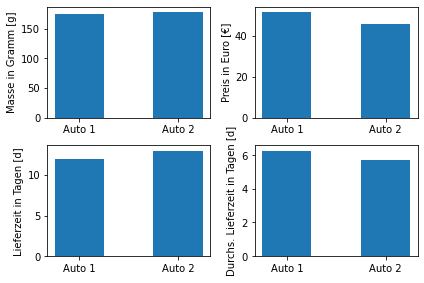

In [15]:
# plot the data, save diagramm as svg-file
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2)

autos = ["Auto 1", "Auto 2"]
axs[0,0].bar(autos,[total_mass1, total_mass], width=0.5)
axs[0,0].set_ylabel("Masse in Gramm [g]")

axs[0,1].bar(autos,[total_price1, total_price], width=0.5)
axs[0,1].set_ylabel("Preis in Euro [€]")

axs[1,0].bar(autos,[total_delivery_time1[0], total_delivery_time[0]], width=0.5)
axs[1,0].set_ylabel("Lieferzeit in Tagen [d]")

axs[1,1].bar(autos,[total_delivery_time1[1], total_delivery_time[1]], width=0.5)
axs[1,1].set_ylabel("Durchs. Lieferzeit in Tagen [d]")


fig.tight_layout()

plt.savefig("kpiplot.svg")




Interpretieren Sie Ihre Ergebnisse. Vergleichen Sie die KPIs Ihrer Autos. Konnten Sie Ihre gewünschte Verbesserung erzielen? Welche Schlüsse ziehen Sie aus den Ergebnissen für die Qualität der beiden
Fahrzeuge?

Anhand der jeweiligen Balkendiagramme ist eindeutig zu erkennen, dass das zweite Auto deutlich preisgünstiger und die durschnittliche Lieferzeit gesunken ist. Trotz dieser großen Veränderungen konnte das Fahrzeuggewicht konstant gehalten werden, um somit auch die nötige Stabilität in verschiedenen Fahrsituationen zu haben. Nichtsdestotrotz hat sich aufgrund der Wahl preisgünstigerer Bauteile die maximale Lieferzeit der Bauteile um einen Tag erhöht. Trotzdem hat sich nach Berücksichtigen aller KPIs die Qualität des zweiten Fahrzeugs gegenüber dem ersten Fahrzeug verbessert.

Diskutieren Sie, inwieweit Ihre entwickelten KPIs die im Skript erläuterten FAIR-Prinzipien erfüllen:

Die entwickelten KPIs, nämlich Fahrzeugmasse, den Fahrzeugpreis, die höchste Lieferzeit unter allen Bauteilen und die durchschnittliche Lieferzeit der Bauteile, können im Hinblick auf die FAIR-Prinzipien wie folgt diskutiert werden:

-Findable:
   - Fahrzeugmasse: Dieser KPI ist relativ einfach auffindbar, da er eine quantifizierbare Messgröße ist und leicht identifiziert werden kann.
   - Fahrzeugpreis: Ähnlich wie die Masse ist der Preis ein leicht auffindbarer KPI, der in der Regel in Dokumenten und Datenbanken und Datenblättern von Bauteilen verfügbar ist.
   - Höchste Lieferzeit unter allen Bauteilen: Dieser KPI könnte in einem System oder einer Datenbank erfasst und somit auffindbar gemacht werden.
   - Durchschnittliche Lieferzeit der Bauteile: Ebenso wie die höchste Lieferzeit kann die durchschnittliche Lieferzeit in einem System erfasst und auffindbar gemacht werden.

-Accessible:
   - Die Zugänglichkeit dieser KPIs hängt von der Veröffentlichung und dem Zugriff auf die relevanten Datenquellen und Systeme ab. Wenn die Datenbanken oder Systeme, in denen diese Informationen gespeichert sind, offen und für berechtigte Benutzer zugänglich sind, erfüllen sie das Prinzip der Zugänglichkeit. Hierbei ist das Hinzufügen der Dateien und den jeweiligen Kommentaren bzgl. der Bearbeitungen auf GitHub eine gute Möglichkeit diese Daten und Kommentare für die jeweiligen Personen zur Verfügung zu stellen

-Interoperable:
   - Um die Konnektivität sicherzustellen, müssen Datenformate und Standards für diese KPIs definiert werden. Wenn diese Standards eingehalten werden und die KPIs in einem gängigen Format vorliegen, können sie in verschiedenen Systemen und Anwendungen interoperabel sein und miteinander verknüpft werden. Da zudem der Weg zur Berechnung der jeweiligen KPI durch die Bearbeitungskommentare auf GitHub sichtbar sind, kann jeder die Berechnungswege nachvollziehen und für Ihre eigenen Berechnungen integrieren. Zudem wurde für den Bau des jeweiligen Autos Lego-Bausteine verwendet, die genaue Preise, Gewichte und Lieferzeiten auf aller Welt haben, wodurch jeder Forschende diese Bausteine und KPIS zusammen nutzen und in der Forschung analysieren kann.

-Reusable :
   - Die Wiederverwendbarkeit dieser KPIs hängt von der Qualität der Metadaten und ihrer Dokumentation ab. Wenn die KPIs mit relevanten Metadaten und einer klaren Datennutzungslizenz versehen sind, können sie von anderen Forschern oder Organisationen wiederverwendet werden.

Insgesamt erfüllen diese KPIs die FAIR-Prinzipien und sind somit sehr gut für die weitere Forschung, Analyse und weitere Autobauten geeignet sind.

## Fazit

Ziehen Sie ein persönliches Fazit. Was haben Sie Neues gelernt?

Das Bearbeiten dieser Aufgaben hat mir vieles Neues gezeigt. Ich konnte nun die FAIR-Prinzipien auf spezifische hergestellte Produkte anwenden und zudem verschiedene KPIs entwickeln, die sowohl sehr gut die jeweiligen Autos charakterisieren, jedoch auch die Autos in Bezug auf die FAIR-Prinzipien bewertet und voneinander differenziert. Des Weiteren konnte ich anhand der beiden Konstruktionen der Autos verstehen, wie man diese am Besten für den Kunden und auch in Bezug der FAIR-Prinzipien auslegt. Mir wurde die klare Hierarchie-Struktur der verschiedenen Baugruppen, Unterbaugruppen und Bauteile der Autos verständlich gezeigt und erklärt, wie man diese mittels Python in weitere digitale Modelle abstrahieren kann.